Фильмы с данными из википедии https://www.kaggle.com/jrobischon/wikipedia-movie-plots 

1.	Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
df = pd.read_csv('wiki_movie_plots_deduped.csv')
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [38]:
df['Plot'][1]

"The moon, painted with a smiling face hangs over a park at night. A young couple walking past a fence learn on a railing and look up. The moon smiles. They embrace, and the moon's smile gets bigger. They then sit down on a bench by a tree. The moon's view is blocked, causing him to frown. In the last scene, the man fans the woman with his hat because the moon has left the sky and is perched over her shoulder to see everything better."

array([[<AxesSubplot:title={'center':'Release Year'}>]], dtype=object)

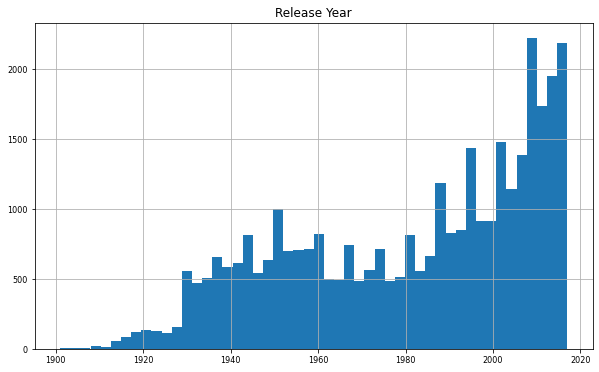

In [39]:
df.hist(figsize=(10, 6), bins=50, xlabelsize=8, ylabelsize=8)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of movies realsed around the world \n over the years')

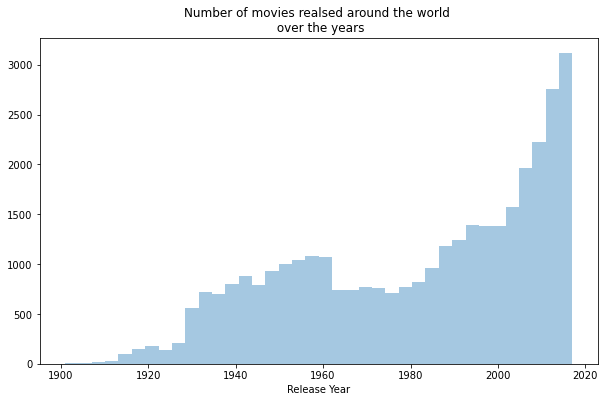

In [40]:
# Check out the overall trend in movie releases over the years around the world 
plt.figure(figsize=(10,6))
sns.distplot(a=df["Release Year"], kde=False)
plt.title("Number of movies realsed around the world \n over the years", loc="center")

In [41]:
df.rename(columns={"Origin/Ethnicity":"Origin"}, inplace=True)

# How many Origins are there in the dataset? 
len(df["Origin"].unique())

24

Text(-9.075000000000003, 0.5, '')

<Figure size 720x360 with 0 Axes>

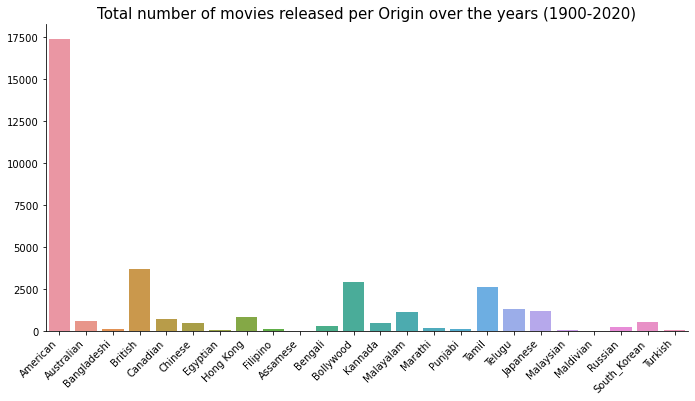

In [42]:
plt.figure(figsize=(10,5))
sns.catplot(x="Origin", kind="count", data=df, height=5, aspect=2)
plt.xticks(rotation=45, 
    horizontalalignment='right')
plt.title("Total number of movies released per Origin over the years (1900-2020)", fontsize=15)
plt.xlabel("")
plt.ylabel("")

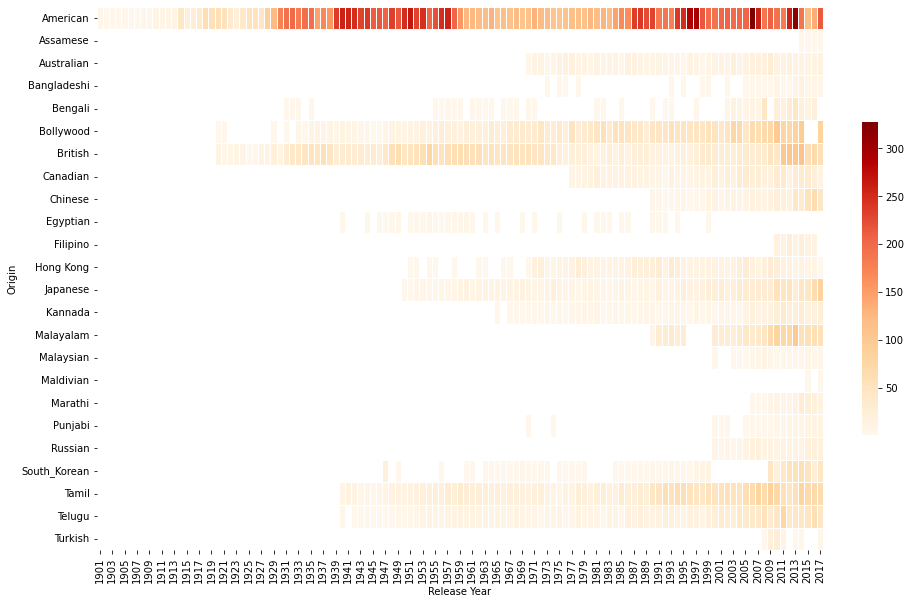

In [43]:
# Group the data by the "Origin" and "Release Year" columns 
# to make visual the periods when the movie production was the most intensive for different countries.
by_country_by_year = df.groupby(["Origin","Release Year"]).size().unstack()

plt.figure(figsize=(14,10))
g = sns.heatmap(
    by_country_by_year, 
    #square=True, # make cells square
    cbar_kws={'fraction' : 0.02}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)

In [44]:
equiv_dict = {"American":"US", "Australian":"Australia", "Bangladeshi":"Bangladesh", 
              "British":"The Great Britain", "Canadian":"Canada", "Chinese":"China", 
              "Egyptian":"Egypt", "Hong Kong":"Hong Kong", "Fillipino":"The Phillipins", 
              "Assamese":"India", "Bengali":"India", "Bollywood":"India", "Kannada":"India", 
              "Malayalam":"India", "Marathi":"India", "Punjabi":"India", "Tamil":"India", 
              "Telugu":"India", "Japanese":"Japan", "Malaysian":"Malaysia", "Maldivian":"Maldives", 
              "Russian":"Russia", "South_Korean":"South_Korea","Turkish":"Turkey"}
df["Country"] = df["Origin"].map(equiv_dict)
len(df["Country"].unique())

16

Text(-9.075000000000003, 0.5, '')

<Figure size 720x360 with 0 Axes>

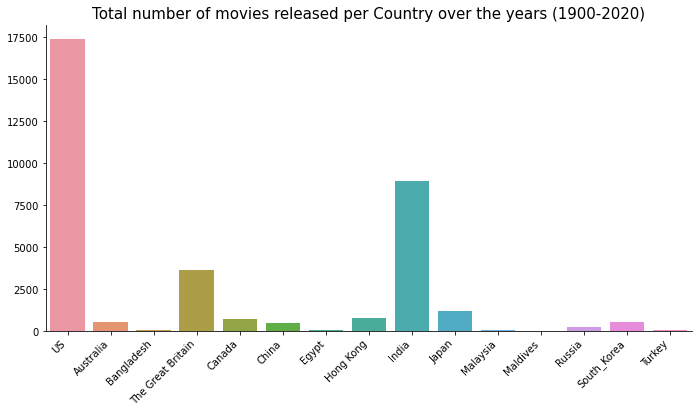

In [45]:
plt.figure(figsize=(10,5))
sns.catplot(x="Country", kind="count", data=df, height=5, aspect=2)
plt.xticks(rotation=45, 
    horizontalalignment='right')
plt.title("Total number of movies released per Country over the years (1900-2020)", fontsize=15)
plt.xlabel("")
plt.ylabel("")

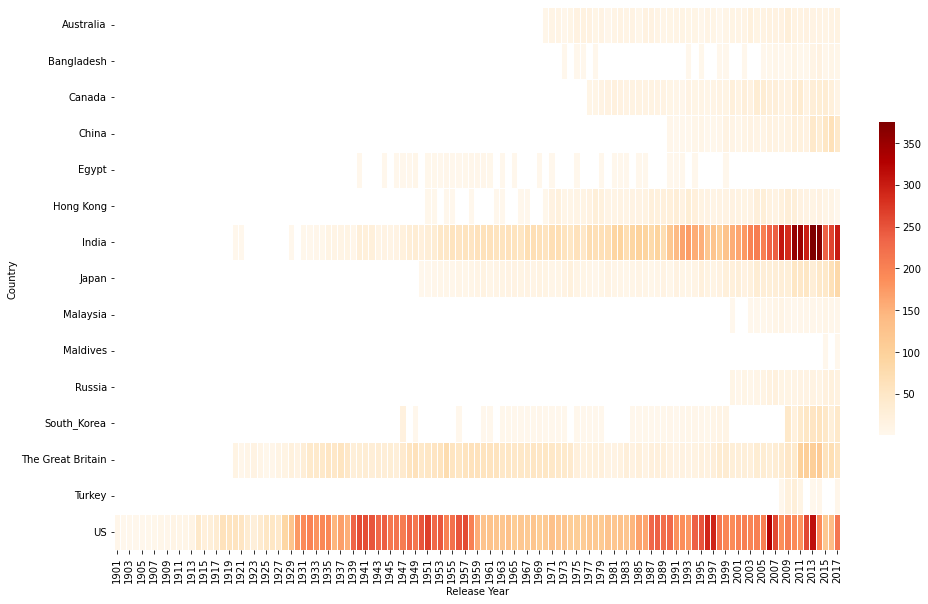

In [46]:
# Group the data by the "Country" and "Release Year" columns 
# to make visual the periods when the movie production was the most intensive for different countries.
by_country_by_year = df.groupby(["Country","Release Year"]).size().unstack()

plt.figure(figsize=(14,10))
g = sns.heatmap(
    by_country_by_year, 
    #square=True, # make cells square
    cbar_kws={'fraction' : 0.02}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)

в США был спад производства фильмов в период с 1959 по 1985 годы.

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Movie production industry growth in India'}, xlabel='Release Year', ylabel='Number of movies'>

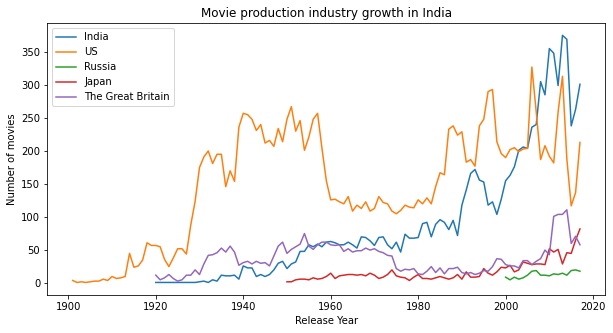

In [55]:
india = df[["Country", "Release Year"]].query('Country == "India" ').groupby("Release Year").size()
US = df[["Country", "Release Year"]].query('Country == "US" ').groupby("Release Year").size()
Russia = df[["Country", "Release Year"]].query('Country == "Russia" ').groupby("Release Year").size()
japan = df[["Country", "Release Year"]].query('Country == "Japan" ').groupby("Release Year").size()
GB = df[["Country", "Release Year"]].query('Country == "The Great Britain" ').groupby("Release Year").size()

plt.figure(figsize=(10,5))
plt.title("Movie production industry growth in India")
plt.ylabel("Number of movies")
plt.legend()
sns.lineplot(data=india, label = 'India')
sns.lineplot(data=US, label = 'US')
sns.lineplot(data=Russia, label = 'Russia')
sns.lineplot(data=japan, label = 'Japan')
sns.lineplot(data=GB, label = 'The Great Britain')
# В выборке отсутствуют данные по России.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


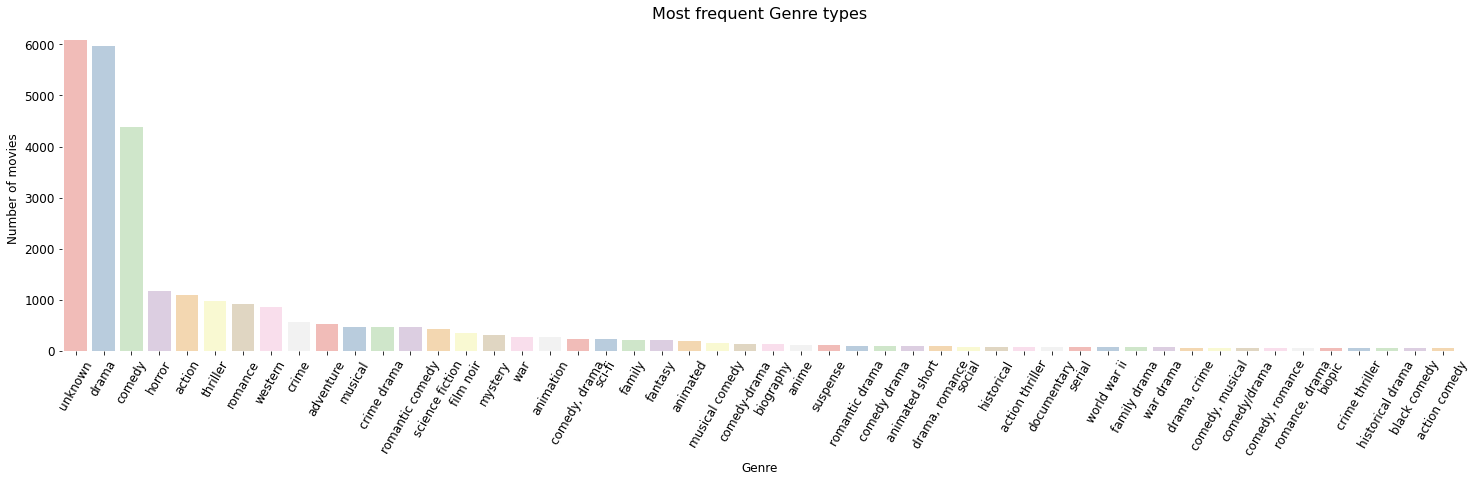

In [48]:
pop_genres = list(df.Genre.unique())[:50]

plt.figure(figsize=(25,6))

sns.countplot(df.Genre,order=pd.value_counts(df.Genre).iloc[:50].index,palette=sns.color_palette("Pastel1", 50))
plt.title('Most frequent Genre types',fontsize=16)
plt.ylabel('Number of movies', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(size=12,rotation=60)
plt.yticks(size=12)
sns.despine(bottom=True, left=True)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


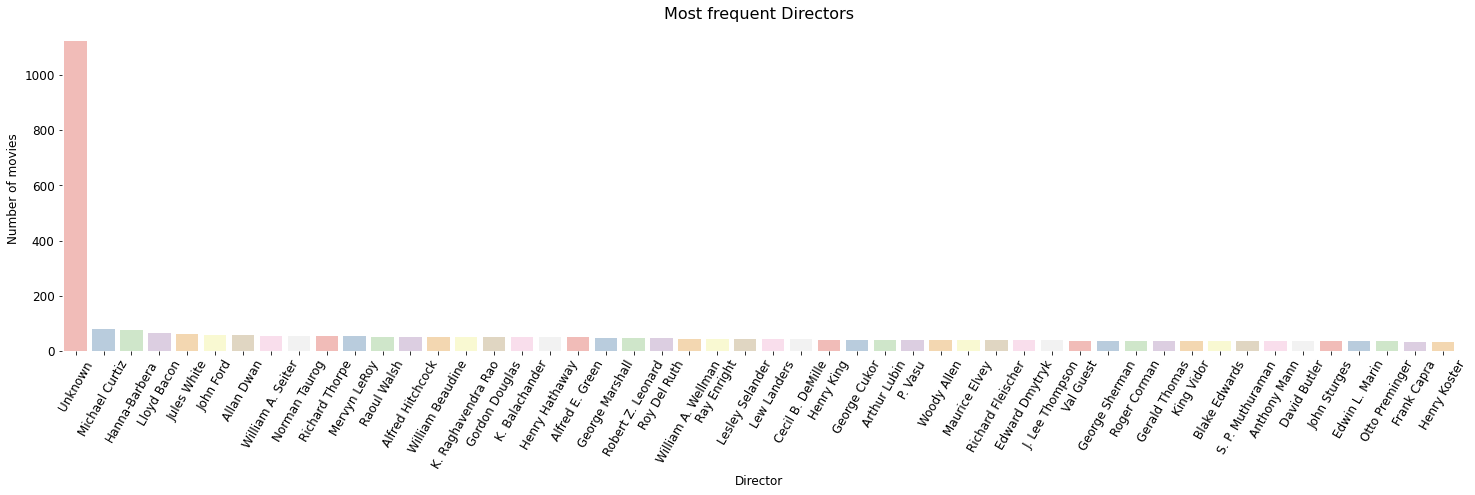

In [53]:
# pop_directors = list(df.Director.unique())[:50]

plt.figure(figsize=(25,6))

sns.countplot(df.Director,order=pd.value_counts(df.Director).iloc[:50].index,palette=sns.color_palette("Pastel1", 50))
plt.title('Most frequent Directors',fontsize=16)
plt.ylabel('Number of movies', fontsize=12)
plt.xlabel('Director', fontsize=12)
plt.xticks(size=12,rotation=60)
plt.yticks(size=12)
sns.despine(bottom=True, left=True)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


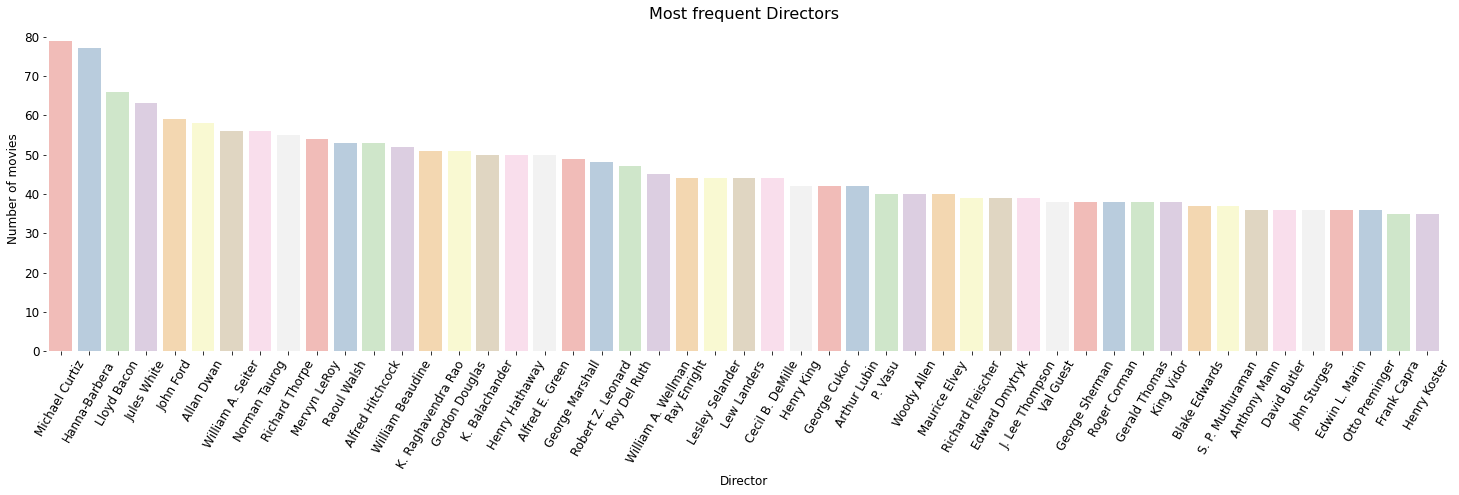

In [54]:
#Количество фильмов по режиссерам, без неизвестных
plt.figure(figsize=(25,6))

sns.countplot(df.Director,order=pd.value_counts(df.Director).iloc[1:50].index,palette=sns.color_palette("Pastel1", 50))
plt.title('Most frequent Directors',fontsize=16)
plt.ylabel('Number of movies', fontsize=12)
plt.xlabel('Director', fontsize=12)
plt.xticks(size=12,rotation=60)
plt.yticks(size=12)
sns.despine(bottom=True, left=True)
plt.show()